In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict 
from scipy import sparse
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import warnings
!pip install cmfrec
from cmfrec import CMF
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [ ]:
warnings.simplefilter('ignore')
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:.2f}'.format
sns.set_style('white')

In [4]:
import os
for dirname, _, filenames in os.walk('/Users/rajashree/Downloads/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/rajashree/Downloads/106266.jpg
/Users/rajashree/Downloads/12+Rules+to+Learn+to+Code+[2nd+Edition]+2022.pdf
/Users/rajashree/Downloads/12dfd494-e234-41d0-90ac-d59a37926b78.png
/Users/rajashree/Downloads/2.1+Heading+Element
/Users/rajashree/Downloads/2.1+Heading+Element.zip
/Users/rajashree/Downloads/2023+Web+Dev+Syllabus.pdf
/Users/rajashree/Downloads/61d74e47-93ff-40b1-aa59-2b8bf54fcc26.png
/Users/rajashree/Downloads/a4c911b9-8d77-4b0f-ab60-8ae528edaefb.png
/Users/rajashree/Downloads/android-studio-2022.3.1.20-windows (1).exe
/Users/rajashree/Downloads/AppBreweryCornellNotesTemplate (1).pdf
/Users/rajashree/Downloads/AppBreweryCornellNotesTemplate (2).pdf
/Users/rajashree/Downloads/AppBreweryCornellNotesTemplate.pdf
/Users/rajashree/Downloads/archive (1).zip
/Users/rajashree/Downloads/archive (2).zip
/Users/rajashree/Downloads/archive.zip
/Users/rajashree/Downloads/aston-martin-7680x4320-13088.jpg
/Users/rajashree/Downloads/astronaut-starfield-7680x4320-12739.jpg
/Users/rajashre

In [6]:
movies = pd.read_fwf('/Users/rajashree/Downloads/movies.dat',encoding='ISO-8859-1',header=None)

In [7]:
movies.shape

(3883, 3)

In [8]:
movies.head()

,0,1,2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN
3,4::Waiting to Exhale (1995)::Comedy|Drama,NaN,NaN
4,5::Father of the Bride Part II (1995)::Comedy,NaN,NaN


In [9]:
movies.drop(columns=[1,2],axis=1,inplace=True)

In [10]:
movies.head()

,0
0,1::Toy Story (1995)::Animation|Children's|Comedy
1,2::Jumanji (1995)::Adventure|Children's|Fantasy
2,3::Grumpier Old Men (1995)::Comedy|Romance
3,4::Waiting to Exhale (1995)::Comedy|Drama
4,5::Father of the Bride Part II (1995)::Comedy


In [11]:
movies.columns = ['Movie ID::Title::Genres']

In [12]:
movies.head()

,Movie ID::Title::Genres
0,1::Toy Story (1995)::Animation|Children's|Comedy
1,2::Jumanji (1995)::Adventure|Children's|Fantasy
2,3::Grumpier Old Men (1995)::Comedy|Romance
3,4::Waiting to Exhale (1995)::Comedy|Drama
4,5::Father of the Bride Part II (1995)::Comedy


In [13]:
delimiter = '::'
movies = movies['Movie ID::Title::Genres'].str.split(delimiter,expand=True)
movies.columns = ['Movie ID', 'Title', 'Genres']
movies.rename(columns={'Movie ID':'MovieID'},inplace=True)
movies1=movies.copy()
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
ratings = pd.read_fwf(r'/Users/rajashree/Downloads/ratings.dat\ratings.dat',encoding='ISO-8859-1',header=None)

In [15]:
ratings.shape

(1000209, 1)

In [16]:
ratings.head()

,0
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291


In [17]:
ratings.columns = ['UserID::MovieID::Rating::Timestamp']

In [18]:
ratings.head()

,UserID::MovieID::Rating::Timestamp
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291


In [19]:
ratings = ratings['UserID::MovieID::Rating::Timestamp'].str.split(delimiter,expand=True)
ratings.columns = ['UserID','MovieID', 'Rating', 'Timestamp']


In [20]:
ratings.shape

(1000209, 4)

In [21]:
ratings1=ratings.copy()
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [22]:
users = pd.read_fwf('/Users/rajashree/Downloads/users.dat',encoding='ISO-8859-1',header=None)

In [23]:
users.columns = ['UserID::Gender::Age::Occupation::Zip-code']

In [24]:
users = users['UserID::Gender::Age::Occupation::Zip-code'].str.split(delimiter, expand=True)
users.columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users1=users.copy()

In [25]:
users.replace({'Age':{'1':  "Under 18",
                      '18':  "18-24",
                      '25':  "25-34",
                      '35':  "35-44",
                      '45':  "45-49",
                      '50':  "50-55",
                      '56':  "56 Above"}}, inplace=True)

In [26]:
users.replace({'Occupation':{'0': "other",
                             '1': "academic/educator",
                             '2': "artist",
                             '3': "clerical/admin",
                             '4': "college/grad student",
                             '5': "customer service",
                             '6': "doctor/health care",
                             '7': "executive/managerial",
                             '8': "farmer",
                             '9': "homemaker",
                             '10': "k-12 student",
                             '11': "lawyer",
                             '12': "programmer",
                             '13': "retired",
                             '14': "sales/marketing",
                             '15': "scientist",
                             '16': "self-employed",
                             '17': "technician/engineer",
                             '18': "tradesman/craftsman",
                             '19': "unemployed",
                             '20': "writer"}}, inplace=True)
users.shape

(6040, 5)

In [27]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,Under 18,k-12 student,48067
1,2,M,56 Above,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,45-49,executive/managerial,02460
4,5,M,25-34,writer,55455


In [28]:
movies['Year'] = movies.Title.str.extract('(\(\d\d\d\d\))',expand=False)
movies['Year'] = movies.Year.str.extract('(\d\d\d\d)',expand=False)
movies['Title'] = movies.Title.str.replace('(\(\d\d\d\d\))', '')
movies['Title'] = movies['Title'].apply(lambda x : x.strip())
movies.head()

,MovieID,Title,Genres,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [29]:
dfmov = movies.copy()
dfmov.dropna(inplace=True)
dfmov.Genres = dfmov.Genres.str.split('|')
dfmov['Genres'] = dfmov['Genres'].apply(lambda x: [i for i in x if i!='A' and i!='D' and i!= 'F' and i!='C' and i!='M' and i!= 'W' and i!= ' '])

for i  in dfmov['Genres']:
    for j in range(len(i)):
        if i[j] == 'Ro' or i[j] == 'Rom' or i[j] == 'Roman' or i[j] == 'R' or i[j] == 'Roma':
            i[j] = 'Romance'
        elif i[j] == 'Chil' or i[j] == 'Childre' or i[j] == 'Childr' or i[j] == "Children'" or i[j] =='Children' or i[j] =='Chi':
            i[j] = "Children's"
        elif i[j] == 'Fantas' or i[j] == 'Fant':
            i[j] = 'Fantasy'
        elif i[j] == 'Dr' or i[j] == 'Dram':
            i[j] = 'Drama'
        elif i[j] == 'Documenta'or i[j] == 'Docu' or i[j] == 'Document' or i[j] == 'Documen':
            i[j] = 'Documentary'
        elif i[j] == 'Wester'or i[j] == 'We':
            i[j] = 'Western'
        elif i[j] == 'Animati':
            i[j] = 'Animation'
        elif i[j] == 'Come'or i[j] == 'Comed' or i[j] == 'Com':
            i[j] = 'Comedy'
        elif i[j] == 'Sci-F'or i[j] == 'S' or i[j] == 'Sci-' or i[j] == 'Sci':
            i[j] = 'Sci-Fi'
        elif i[j] == 'Adv'or i[j] == 'Adventu' or i[j] == 'Adventur' or i[j] == 'Advent':
            i[j] = 'Adventure'
        elif i[j] == 'Horro'or i[j] == 'Horr':
            i[j] = 'Horror'
        elif i[j] == 'Th'or i[j] == 'Thri' or i[j] == 'Thrille':
            i[j] = 'Thriller'
        elif i[j] == 'Acti':
            i[j] = 'Action'
        elif i[j] == 'Wa':
            i[j] = 'War'
        elif i[j] == 'Music':
            i[j] = 'Musical'

In [30]:
dfmov.head()

,MovieID,Title,Genres,Year
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",1995
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]",1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995
3,4,Waiting to Exhale (1995),"[Comedy, Drama]",1995
4,5,Father of the Bride Part II (1995),[Comedy],1995


In [31]:
df_1 = pd.merge(dfmov,ratings,how='inner',on='MovieID')
df_1.head()

,MovieID,Title,Genres,Year,UserID,Rating,Timestamp
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",1995,1,5,978824268
1,1,Toy Story (1995),"[Animation, Children's, Comedy]",1995,6,4,978237008
2,1,Toy Story (1995),"[Animation, Children's, Comedy]",1995,8,4,978233496
3,1,Toy Story (1995),"[Animation, Children's, Comedy]",1995,9,5,978225952
4,1,Toy Story (1995),"[Animation, Children's, Comedy]",1995,10,5,978226474


In [32]:
data = pd.merge(df_1,users,how='inner',on='UserID')
data.head()

,MovieID,Title,Genres,Year,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",1995,1,5,978824268,F,Under 18,k-12 student,48067
1,1,Toy Story (1995),"[Animation, Children's, Comedy]",1995,6,4,978237008,F,50-55,homemaker,55117
2,1,Toy Story (1995),"[Animation, Children's, Comedy]",1995,8,4,978233496,M,25-34,programmer,11413
3,1,Toy Story (1995),"[Animation, Children's, Comedy]",1995,9,5,978225952,M,25-34,technician/engineer,61614
4,1,Toy Story (1995),"[Animation, Children's, Comedy]",1995,10,5,978226474,F,35-44,academic/educator,95370


In [33]:
print("No. of rows: ", data.shape[0])
print("No. of columns: ", data.shape[1])

No. of rows:  996144
No. of columns:  11


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996144 entries, 0 to 996143
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   MovieID     996144 non-null  object
 1   Title       996144 non-null  object
 2   Genres      996144 non-null  object
 3   Year        996144 non-null  object
 4   UserID      996144 non-null  object
 5   Rating      996144 non-null  object
 6   Timestamp   996144 non-null  object
 7   Gender      996144 non-null  object
 8   Age         996144 non-null  object
 9   Occupation  996144 non-null  object
 10  Zip-code    996144 non-null  object
dtypes: object(11)
memory usage: 83.6+ MB


In [35]:
missing_value = pd.DataFrame({
    'Missing Value' : data.isnull().sum(),
    'Percentage' : (data.isnull().sum()/len(data))*100
})

In [36]:
missing_value.sort_values(by='Percentage',ascending=False)

,Missing Value,Percentage
MovieID,0,0.0
Title,0,0.0
Genres,0,0.0
Year,0,0.0
UserID,0,0.0
Rating,0,0.0
Timestamp,0,0.0
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0


In [37]:
data.columns

Index(['MovieID', 'Title', 'Genres', 'Year', 'UserID', 'Rating', 'Timestamp',
       'Gender', 'Age', 'Occupation', 'Zip-code'],
      dtype='object')

In [38]:
data['Datatime'] = pd.to_datetime(data['Timestamp'], unit='s')
data['Year'] = data['Year'].astype('int32')
data['Rating']=data['Rating'].astype('int32')

C:\Users\rajashree\AppData\Local\Temp\ipykernel_18208\1426586265.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data['Datatime'] = pd.to_datetime(data['Timestamp'], unit='s')


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996144 entries, 0 to 996143
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   MovieID     996144 non-null  object        
 1   Title       996144 non-null  object        
 2   Genres      996144 non-null  object        
 3   Year        996144 non-null  int32         
 4   UserID      996144 non-null  object        
 5   Rating      996144 non-null  int32         
 6   Timestamp   996144 non-null  object        
 7   Gender      996144 non-null  object        
 8   Age         996144 non-null  object        
 9   Occupation  996144 non-null  object        
 10  Zip-code    996144 non-null  object        
 11  Datatime    996144 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(2), object(9)
memory usage: 83.6+ MB


In [40]:
bins = [1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 2000]
labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
data['ReleaseDec'] = pd.cut(data['Year'], bins=bins, labels=labels)

In [41]:
data.head()

,MovieID,Title,Genres,Year,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Datatime,ReleaseDec
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",1995,1,5,978824268,F,Under 18,k-12 student,48067,2001-01-06 23:37:36,90s
1,1,Toy Story (1995),"[Animation, Children's, Comedy]",1995,6,4,978237008,F,50-55,homemaker,55117,2000-12-31 04:29:52,90s
2,1,Toy Story (1995),"[Animation, Children's, Comedy]",1995,8,4,978233496,M,25-34,programmer,11413,2000-12-31 03:31:12,90s
3,1,Toy Story (1995),"[Animation, Children's, Comedy]",1995,9,5,978225952,M,25-34,technician/engineer,61614,2000-12-31 01:25:20,90s
4,1,Toy Story (1995),"[Animation, Children's, Comedy]",1995,10,5,978226474,F,35-44,academic/educator,95370,2000-12-31 01:34:56,90s


In [42]:
user_ratings = data[['UserID','Rating']].groupby('UserID').mean()

Text(0, 0.5, 'Frequency')

<Figure size 800x800 with 0 Axes>

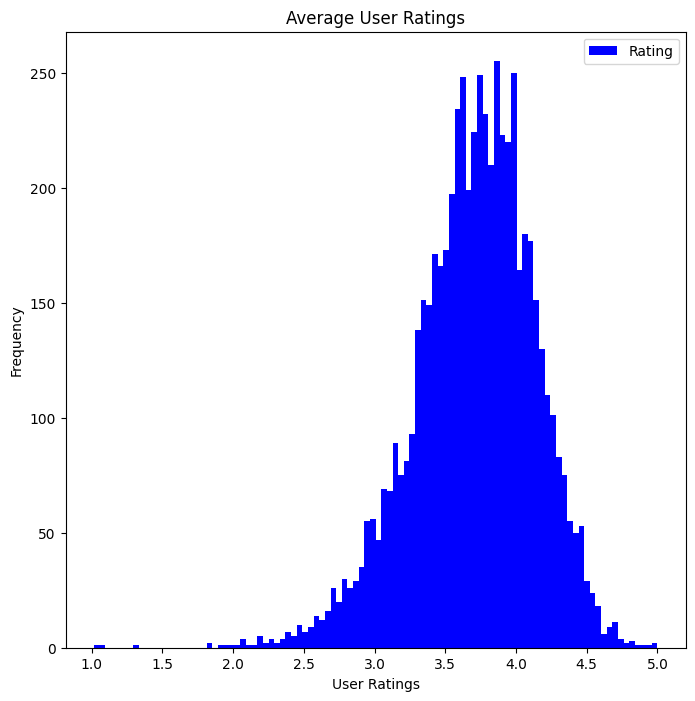

In [43]:
fig = plt.figure(figsize = (8,8))
user_ratings.plot(kind = 'hist', bins = 100, figsize = (8,8), color = 'blue')
plt.plot()
plt.xlabel('User Ratings')
plt.title('Average User Ratings')
plt.ylabel('Frequency')

C:\Users\rajashree\AppData\Local\Temp\ipykernel_18208\3692754638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ReleaseDec', data=data,palette="Set2")


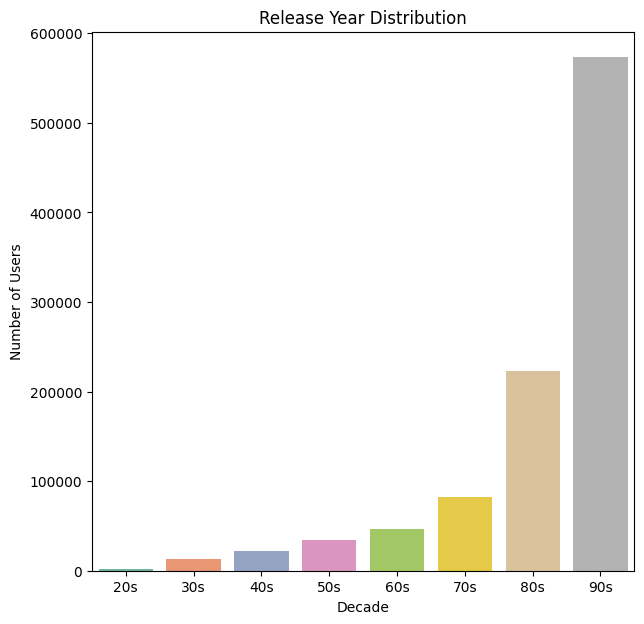

In [44]:
plt.figure(figsize=(7, 7))
sns.countplot(x='ReleaseDec', data=data,palette="Set2")
plt.title('Release Year Distribution')
plt.xlabel('Decade')
plt.ylabel('Number of Users')
plt.show()


In [45]:
genres_df = pd.get_dummies(dfmov['Genres'].apply(pd.Series).stack()).sum(axis=0)
genres_df.head()

                8
Action        501
Adventure     282
Animation     104
Children's    249
dtype: int64

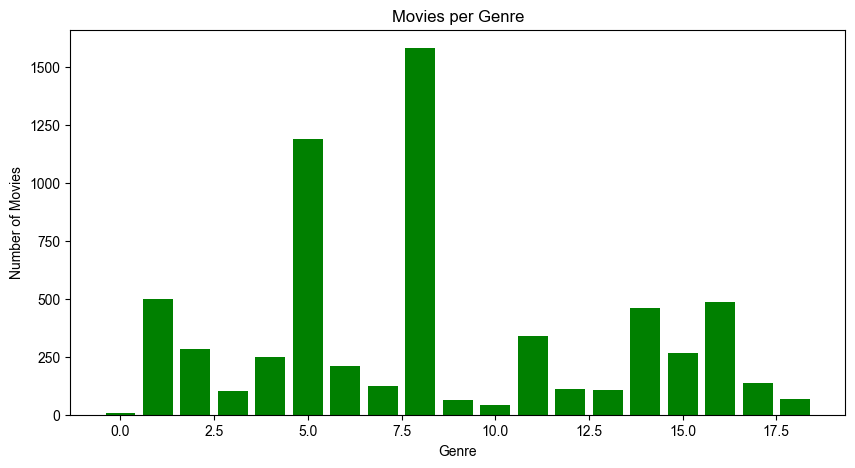

In [46]:
genre_list=['action', 'adventure','animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama','fantasy', 'film-noir', 'horror', 'musical', 'mystery', 'romance', 'sci-fi','thriller', 'war', 'western']
x = np.arange(19)
plt.figure(figsize = (10,5))
plt.bar(x,genres_df , color = 'g')

plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Movies per Genre')
sns.set(font_scale=1.5)
plt.show()

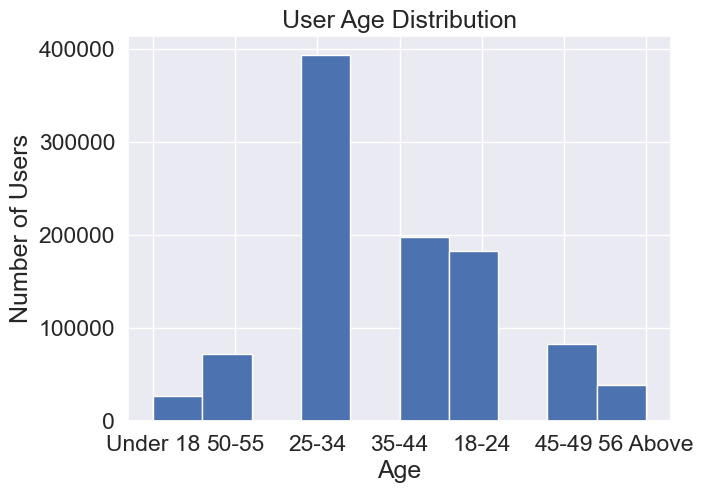

In [47]:
data['Age'].hist(figsize=(7, 5))
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

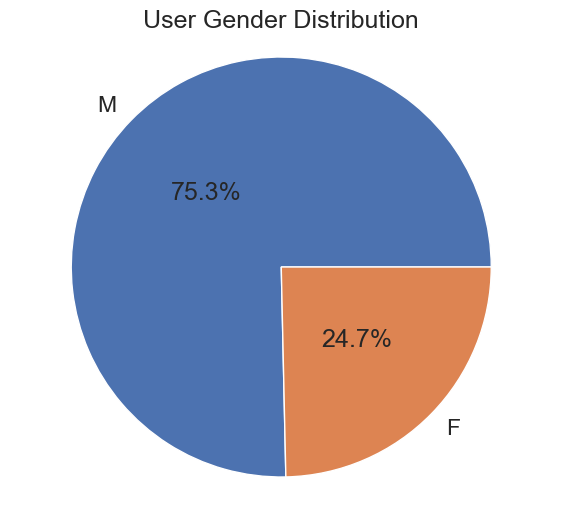

In [48]:
x = data['Gender'].value_counts().values
plt.figure(figsize=(7, 6))
plt.pie(x, center=(0, 0), radius=1.5, labels=['M','F'], autopct='%1.1f%%', pctdistance=0.5)
plt.title('User Gender Distribution')
plt.axis('equal')
plt.show()


C:\Users\rajashree\AppData\Local\Temp\ipykernel_18208\371710362.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Occupation', data=data,palette="Set1")


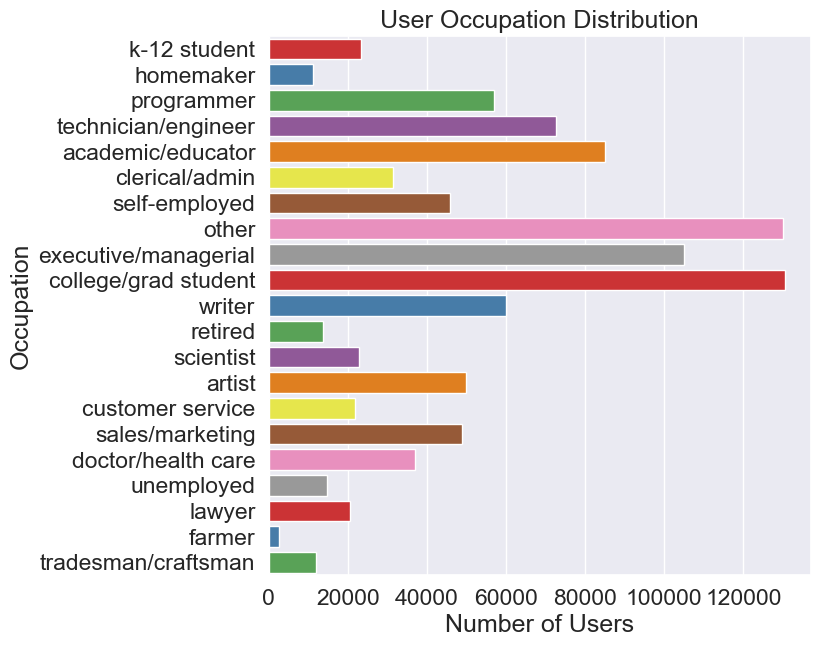

In [49]:
plt.figure(figsize=(7, 7))
sns.countplot(y='Occupation', data=data,palette="Set1")
plt.title('User Occupation Distribution')
plt.xlabel('Number of Users')
plt.ylabel('Occupation')
plt.show()


In [50]:
movies_rating_count = data.groupby(by=['Title'])['Rating'].count().reset_index()[['Title','Rating']]
movies_rating_count.rename(columns = {'Rating' : 'totalRatingCount'},inplace=True)
movies_rating_count.head()

,Title,totalRatingCount
0,"$1,000,000 Duck (1971)",37
1,'Night Mother (1986),70
2,'Til There Was You (1997),52
3,"'burbs, The (1989)",303
4,...And Justice for All (1979),199


In [51]:
top10_movies=movies_rating_count[['Title','totalRatingCount']].sort_values(by='totalRatingCount',ascending=False).head(10)
top10_movies

,Title,totalRatingCount
126,American Beauty (1999),3428
3135,Star Wars: Episode IV - A New Hope (1977),2991
3136,Star Wars: Episode V - The Empire Strikes Back...,2990
3137,Star Wars: Episode VI - Return of the Jedi (1983),2883
1777,Jurassic Park (1993),2672
2877,Saving Private Ryan (1998),2653
3274,Terminator 2: Judgment Day (1991),2649
2098,"Matrix, The (1999)",2590
257,Back to the Future (1985),2583
2972,"Silence of the Lambs, The (1991)",2578


C:\Users\rajashree\AppData\Local\Temp\ipykernel_18208\2523600024.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")


Text(0, 0.5, 'User Rating count')

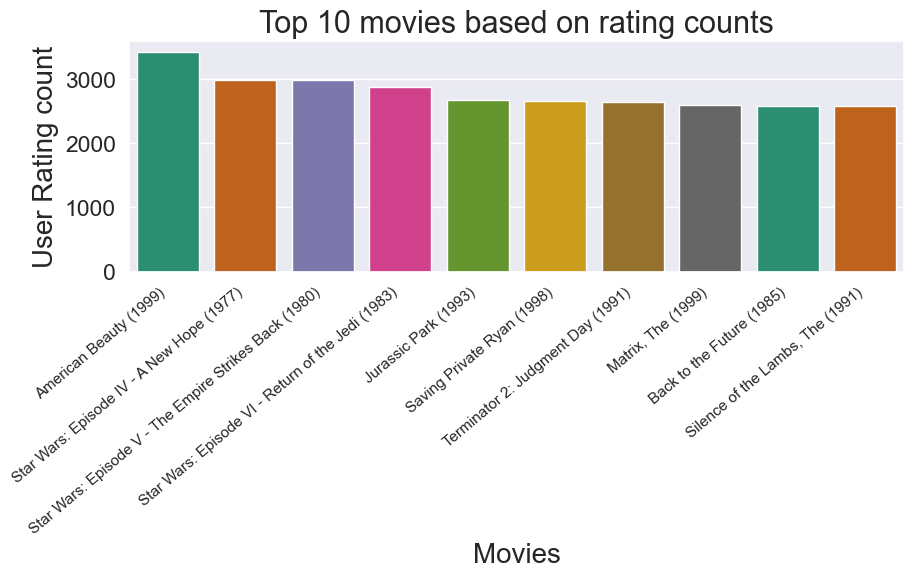

In [52]:
plt.figure(figsize=(10,3))
ax=sns.barplot(x="Title", y="totalRatingCount", data=top10_movies, palette="Dark2",hue="Title",legend=False)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 movies based on rating counts',fontsize = 22)
ax.set_xlabel('Movies',fontsize = 20) 
ax.set_ylabel('User Rating count', fontsize = 20)

In [53]:
matrix = pd.pivot_table(data,index='UserID',columns='Title',values='Rating',aggfunc='mean') 
matrix.fillna(0,inplace=True)
matrix.shape

(6040, 3682)

In [54]:
matrix.head(10)

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
n_users = data['UserID'].nunique()
n_movies = data['MovieID'].nunique()
sparsity = round(1.0 - data.shape[0] / float( n_users * n_movies), 3)
print('The sparsity level of dataset is ' +  str(sparsity * 100) + '%')

The sparsity level of dataset is 95.5%


In [56]:
data[data['Title']=="Jurassic Park (1993)"]

,MovieID,Title,Genres,Year,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Datatime,ReleaseDec
128374,480,Jurassic Park (1993),"[Action, Adventure, Sci-Fi]",1993,2,5,978299809,M,56 Above,self-employed,70072,2000-12-31 21:57:20,90s
128375,480,Jurassic Park (1993),"[Action, Adventure, Sci-Fi]",1993,3,4,978297690,M,25-34,scientist,55117,2000-12-31 21:21:04,90s
128376,480,Jurassic Park (1993),"[Action, Adventure, Sci-Fi]",1993,4,4,978294008,M,45-49,executive/managerial,02460,2000-12-31 20:20:16,90s
128377,480,Jurassic Park (1993),"[Action, Adventure, Sci-Fi]",1993,7,4,978234607,M,35-44,academic/educator,06810,2000-12-31 03:50:24,90s
128378,480,Jurassic Park (1993),"[Action, Adventure, Sci-Fi]",1993,8,5,978228960,M,25-34,programmer,11413,2000-12-31 02:16:32,90s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131041,480,Jurassic Park (1993),"[Action, Adventure, Sci-Fi]",1993,6026,2,9567259,M,35-44,doctor/health care,11210,1970-04-21 17:34:19,90s
131042,480,Jurassic Park (1993),"[Action, Adventure, Sci-Fi]",1993,6030,5,9567185,M,25-34,technician/engineer,3261,1970-04-21 17:33:05,90s
131043,480,Jurassic Park (1993),"[Action, Adventure, Sci-Fi]",1993,6033,5,9567140,M,50-55,retired,7823,1970-04-21 17:32:20,90s
131044,480,Jurassic Park (1993),"[Action, Adventure, Sci-Fi]",1993,6035,2,9567110,F,25-34,academic/educator,78734,1970-04-21 17:31:50,90s


In [57]:
movie_name = "Jurassic Park (1993)"
movie_rating = matrix[movie_name]
movie_rating

UserID
1       0.0
10      4.0
100     3.0
1000    4.0
1001    0.0
       ... 
995     0.0
996     4.0
997     4.0
998     0.0
999     0.0
Name: Jurassic Park (1993), Length: 6040, dtype: float64

In [58]:
similar_movies = matrix.corrwith(movie_rating)
sim_df = pd.DataFrame(similar_movies, columns=['Correlation'])
sim_df.sort_values('Correlation', ascending=False,inplace=True)
sim_df.iloc[1:, :].head()

,Correlation
Title,
Men in Black (1997),0.543965
Terminator 2: Judgment Day (1991),0.502907
Total Recall (1990),0.493974
"Lost World: Jurassic Park, The (1997)",0.477474
Independence Day (ID4) (1996),0.469595


In [59]:
item_sim = cosine_similarity(matrix.T)
item_sim

array([[1.        , 0.07235746, 0.03701053, ..., 0.        , 0.12024178,
        0.02700277],
       [0.07235746, 1.        , 0.11528952, ..., 0.        , 0.        ,
        0.07780705],
       [0.03701053, 0.11528952, 1.        , ..., 0.        , 0.04752635,
        0.0632837 ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.04564448],
       [0.12024178, 0.        , 0.04752635, ..., 0.        , 1.        ,
        0.04433508],
       [0.02700277, 0.07780705, 0.0632837 , ..., 0.04564448, 0.04433508,
        1.        ]])

In [60]:
item_sim_matrix = pd.DataFrame(item_sim, index=matrix.columns, columns=matrix.columns)
item_sim_matrix.head()

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",1.000000,0.072357,0.037011,0.079291,0.060838,0.00000,0.058619,0.189965,0.172254,0.094785,...,0.038725,0.076474,0.000000,0.044074,0.0,0.045280,0.039395,0.000000,0.120242,0.027003
'Night Mother (1986),0.072357,1.000000,0.115290,0.115545,0.159526,0.00000,0.076798,0.147437,0.095922,0.111413,...,0.053010,0.087828,0.063758,0.135962,0.0,0.091150,0.074787,0.000000,0.000000,0.077807
'Til There Was You (1997),0.037011,0.115290,1.000000,0.098756,0.066301,0.08025,0.127895,0.112654,0.125670,0.079115,...,0.029200,0.062893,0.000000,0.079187,0.0,0.022594,0.079261,0.000000,0.047526,0.063284
"'burbs, The (1989)",0.079291,0.115545,0.098756,1.000000,0.143620,0.00000,0.192191,0.246927,0.175885,0.170719,...,0.113386,0.207897,0.019962,0.138064,0.0,0.055704,0.161174,0.000000,0.033567,0.110525
...And Justice for All (1979),0.060838,0.159526,0.066301,0.143620,1.000000,0.00000,0.075093,0.194154,0.116379,0.205486,...,0.089998,0.153006,0.067009,0.109029,0.0,0.086080,0.110867,0.074317,0.000000,0.111040


In [61]:
user_sim = cosine_similarity(matrix)
user_sim

array([[1.        , 0.25586725, 0.12396703, ..., 0.15926709, 0.11935626,
        0.12205855],
       [0.25586725, 1.        , 0.25863269, ..., 0.16071024, 0.13280705,
        0.24681021],
       [0.12396703, 0.25863269, 1.        , ..., 0.20430203, 0.11352239,
        0.30610356],
       ...,
       [0.15926709, 0.16071024, 0.20430203, ..., 1.        , 0.18657496,
        0.18245166],
       [0.11935626, 0.13280705, 0.11352239, ..., 0.18657496, 1.        ,
        0.10797727],
       [0.12205855, 0.24681021, 0.30610356, ..., 0.18245166, 0.10797727,
        1.        ]])

In [62]:
user_sim_matrix = pd.DataFrame(user_sim, index=matrix.index, columns=matrix.index)
user_sim_matrix.head()

UserID,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,990,991,992,993,994,995,996,997,998,999
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.255867,0.123967,0.207800,0.139266,0.110320,0.121384,0.179293,0.103896,0.052816,...,0.079367,0.038048,0.032136,0.066641,0.070052,0.035731,0.170184,0.159267,0.119356,0.122059
10,0.255867,1.000000,0.258633,0.279386,0.155439,0.112477,0.141431,0.429555,0.190388,0.102088,...,0.153811,0.186509,0.083413,0.123568,0.118096,0.145981,0.300856,0.160710,0.132807,0.246810
100,0.123967,0.258633,1.000000,0.297539,0.075708,0.110450,0.358686,0.236263,0.172872,0.099147,...,0.098235,0.097953,0.065152,0.176048,0.271311,0.033754,0.344290,0.204302,0.113522,0.306104
1000,0.207800,0.279386,0.297539,1.000000,0.094849,0.047677,0.201722,0.354078,0.325966,0.130702,...,0.170100,0.076779,0.000000,0.197410,0.380741,0.044404,0.330748,0.172803,0.098456,0.245292
1001,0.139266,0.155439,0.075708,0.094849,1.000000,0.164793,0.053867,0.149363,0.138551,0.134660,...,0.146216,0.026881,0.096975,0.117815,0.092201,0.109660,0.222037,0.100745,0.269852,0.175451


In [95]:
model_knn = NearestNeighbors(metric='cosine')
model_knn.fit(matrix.T)

NearestNeighbors(metric='cosine')

In [96]:
distances, indices = model_knn.kneighbors(matrix.T,n_neighbors=6)

In [97]:
result = pd.DataFrame(indices, columns=['Title1','Title2','Title3', 'Title4', 'Title5', 'Title6'])
result.head()

,Title1,Title2,Title3,Title4,Title5,Title6
0,0,738,418,288,3283,586
1,1,810,73,2193,3072,3408
2,2,1642,2561,3359,2620,2021
3,3,1471,2195,1317,1053,3552
4,4,27,729,897,497,948


In [98]:
result2 = result.copy()
for i in range(1, 7):
    mov = pd.DataFrame(matrix.T.index).reset_index()
    mov = mov.rename(columns={'index':f'Title{i}'})
    result2 = pd.merge(result2, mov, on=[f'Title{i}'], how='left')
    result2 = result2.drop(f'Title{i}', axis=1)
    result2 = result2.rename(columns={'Title':f'Title{i}'})
result2.head()

,Title1,Title2,Title3,Title4,Title5,Title6
0,"$1,000,000 Duck (1971)","Computer Wore Tennis Shoes, The (1970)",Blackbeard's Ghost (1968),"Barefoot Executive, The (1971)",That Darn Cat! (1965),Candleshoe (1977)
1,'Night Mother (1986),"Cry in the Dark, A (1988)",Agnes of God (1985),Mommie Dearest (1981),Sophie's Choice (1982),"Trip to Bountiful, The (1985)"
2,'Til There Was You (1997),If Lucy Fell (1996),Picture Perfect (1997),To Gillian on Her 37th Birthday (1996),Practical Magic (1998),Mad Love (1995)
3,"'burbs, The (1989)",Harry and the Hendersons (1987),"Money Pit, The (1986)",Ghostbusters II (1989),European Vacation (1985),Weekend at Bernie's (1989)
4,...And Justice for All (1979),52 Pick-Up (1986),Coma (1978),Deliverance (1972),"Boys from Brazil, The (1978)",Dog Day Afternoon (1975)


In [99]:
rm = data.pivot(index= 'UserID', columns= 'MovieID', values = 'Rating').fillna(0)
rm.head()

MovieID,1,10,100,1000,1002,1003,1004,1005,1006,1007,...,99,990,991,992,993,994,996,997,998,999
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
user_itm = data[['UserID', 'MovieID', 'Rating']].copy()
user_itm.columns = ['UserId', 'ItemId', 'Rating']
user_itm.head(2)

,UserId,ItemId,Rating
0,1,1,5
1,6,1,4


In [101]:
print(user_itm.shape)
print("No.of Users:",len(user_itm['UserId'].unique()))
print("No.of Items:",len(user_itm['ItemId'].unique()))

(996144, 3)
No.of Users: 6040
No.of Items: 3682
